# 감정 분석(Sentiment Analysis)

* 감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법
* 감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 알아보는데 유용한 기법
* 감정 분석을 하기 위해선 미리 정의된 **감정 어휘 사전**이 필요
* 감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우
* 토픽 모델링이 텍스트의 주제를 찾아낸다면, 감정 분석은 텍스트의 의견을 찾아냄
* 텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있음

![2655364B5925AC9606[1].png](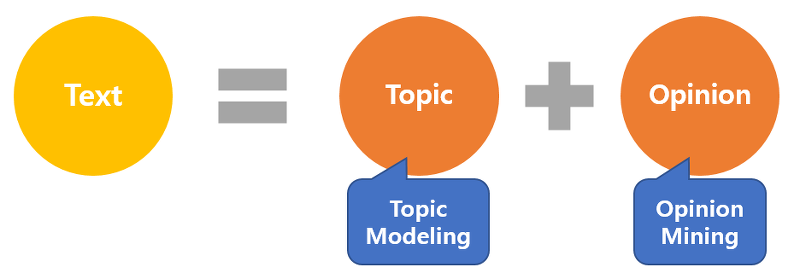)

* 감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있음
* 특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대해 신속하게 대처 가능

* 파이썬으로 감정 분석하는 방법은 크게 두 가지로 구분
  + **감정 어휘 사전**을 이용한 감정 상태 분류
    -  미리 분류해둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 **사전에 기반해 분류**하고, 그 감정가를 계산
    - 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정의해둬야 함
  + **기계학습**을 이용한 감정 상태 분류
    - **분석 데이터의 일부를 훈련 데이터**로 사용해 그로부터 텍스트의 감정 상태를 분류
    - 이 때 사용되는 훈련 데이터는 **사용자가 분류한 감정 라벨**이 포함되어 있어야 하며,  
이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류

## 감정 어휘 사전을 이용한 감정 상태 분류

### 감정 사전 준비

*   감정 사전 라이브러리를 설치
*   afinn은 영어에 대한 긍정, 부정에 대한 감정 사전을 제공


In [1]:
#감정 사전 준비(afinn : 영어에 대한 긍/부정 감정사전 제공)
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 432.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=252c2347bf92da9decb9080f23295586a3a0d58d922735dfc5bf6465434b60ff
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


### 데이터 준비

1.   사용할 데이터를 구성
2.   데이터는 사이킷런에 내장되어 있는 뉴스그룹 데이터를 이용

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset='train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

### 감정 상태 분류 및 시각화

*   감정 사전을 구성하고 감정 스코어를 측정
*   afinn 라이브러리는 감정 사전과 더불어 편리하게 감정가를 계산할 수 있는 함수를 제공

In [3]:
from afinn import Afinn

afinn = Afinn()     #감정사전 구성
for i in range(3):
    print(afinn.score(newsdata.data[i]))    #뉴스별 감정점수

7.0
11.0
16.0


In [5]:
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

*   모든 뉴스에 대한 감정을 시각화
*   긍정과 부정에 대한 갯수를 시각화



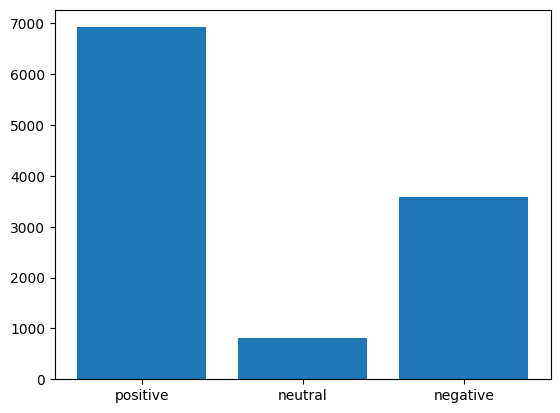

In [4]:


#긍정/중립/부정 개수 시각화
positive = 0
neutral = 0
negative = 0

for i in newsdata.data:
    score = afinn.score(i)
    if score > 0:
        positive += 1
    elif score == 0:
        neutral += 1
    else :
        negative += 1

plt.bar(np.arange(3), [positive, neutral, negative])
plt.xticks(np.arange(3), ['positive', 'neutral', 'negative']);

## 기계학습을 이용한 감정 분석

In [15]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

!cd Mecab-ko-for-Google-Colab

!bash install_mecab-ko_on_colab_light_220429.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 11.26 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-01-22 04:14:07--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20filename%3D%22mecab-0.996-ko-0.9.2.t

### 네이버 영화 리뷰 데이터

* 참고: https://wikidocs.net/44249

#### 데이터 로드

* 데이터를 웹에서 바로 받아오기 위해 `urllib.request` 사용
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
* 받아온 데이터를 `dataframe`으로 변환하고 데이터를 확인



In [1]:
#데이터 준비
import urllib.request
import pandas as pd

train_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
test_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)

train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


#### 중복 및 결측치 처리

*   데이터 개수 확인
*   데이터에 중복이 존재한다면 이를 제거



#### 데이터 정제



*   데이터에서 한글과 공백을 제외하고 모두 제거



In [4]:
train_data.drop_duplicates(subset=['document'], inplace=True)
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
train_data['document'].replace('', np.nan, inplace=True)
train_data = train_data.dropna(how='any')

print(len(train_data))

143681


<ipython-input-4-5107013afbc4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')


In [5]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')

print(len(test_data))

48995


<ipython-input-5-0b80b994e406>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')


#### 토큰화 및 불용어 제거



* 단어들을 분리하고 불용어를 제거함
* 불용어 사전: `'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'`



In [37]:
#불용어 제거
from konlpy.tag import Mecab

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
mecab = Mecab()

X_train, X_test = [], []
for sentence in train_data['document']:
    X_train.append([word for word in mecab.morphs(sentence) if not word in stopwords])
for sentence in test_data['document']:
    X_test.append([word for word in mecab.morphs(sentence) if not word in stopwords])

print(X_train[:3])

[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '지', '않', '구나'], ['너무', '재', '밓었다그래서보는것을추천한다']]


In [53]:
#토큰화
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [54]:
print(list(tokenizer.word_index.keys())[:5], list(tokenizer.word_index.values())[:5])

['영화', '다', '고', '하', '을'] [1, 2, 3, 4, 5]


#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [55]:
#빈도수 낮은 단어 제거
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value
    if value < threshold :
        rare_cnt += 1
        rare_freq = rare_freq + value

print('전체 단어 수:', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수 : {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율 : {}'.format(rare_cnt/words_cnt*100))
print('희귀 단어 등장 빈도 비율 : {}'.format((rare_freq/words_freq)*100))

전체 단어 수: 50048
빈도가 2 이하인 희귀 단어 수 : 28430
희귀 단어 비율 : 56.80546675191815
희귀 단어 등장 빈도 비율 : 1.7701382123037266


In [56]:
vocab_size = words_cnt - rare_cnt + 2 #(0번째 padding, out of vocabulary token) = 2

print(vocab_size)

21620


In [57]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [59]:
X_train[:3]

[[25, 65, 909, 31, 213, 13, 26, 696],
 [990, 479, 326, 630, 2, 108, 1548, 45, 787, 950, 9, 36, 366],
 [17, 190, 1]]

In [60]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [61]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis = 0)
y_train = np.delete(y_train, drop_train, axis = 0)

print(len(X_train))

143652


#### 패딩



*   리뷰의 전반적인 길이를 확인
*   모델의 입력을 위해 동일한 길이로 맞춰줌



리뷰 최대 길이 : 83
리뷰 평균 길이 : 13.939931222677025


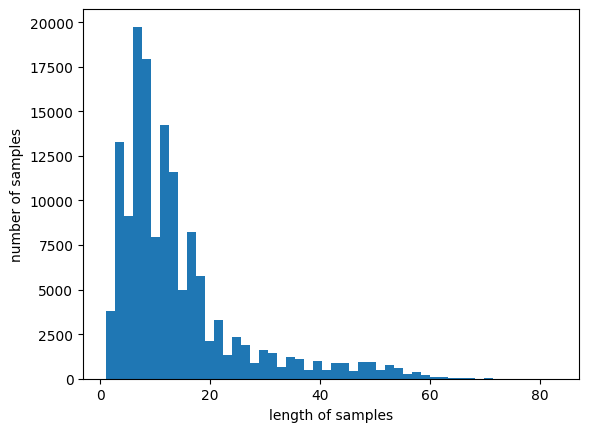

In [62]:
#padding 위해 길이 분포 확인
print('리뷰 최대 길이 :', max(len(l) for l in X_train))
print('리뷰 평균 길이 :', sum(map(len, X_train)) / len(X_train))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples');

In [63]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 60
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습

*   감정 상태 분류 모델을 선언하고 학습
*   모델은 일반적인 LSTM 모델을 사용



In [64]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [65]:
model = Sequential([Embedding(vocab_size, 100),
                    LSTM(128),
                    Dense(1, activation='sigmoid')])

In [66]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         2162000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2279377 (8.70 MB)
Trainable params: 2279377 (8.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
X_train

array([[    0,     0,     0, ...,    13,    26,   696],
       [    0,     0,     0, ...,     9,    36,   366],
       [    0,     0,     0, ...,    17,   190,     1],
       ...,
       [    0,     0,     0, ..., 10999,  2649,     3],
       [    0,     0,     0, ...,    52,   368,  8174],
       [    0,     0,     0, ...,    78,  2608,     2]], dtype=int32)

In [68]:
history = model.fit(X_train, y_train, epochs=20,
                    batch_size=64, validation_split=0.2,
                   verbose=2)

Epoch 1/20
1796/1796 - 38s - loss: 0.4118 - acc: 0.8106 - val_loss: 0.3674 - val_acc: 0.8358 - 38s/epoch - 21ms/step
Epoch 2/20
1796/1796 - 13s - loss: 0.3409 - acc: 0.8525 - val_loss: 0.3435 - val_acc: 0.8470 - 13s/epoch - 7ms/step
Epoch 3/20
1796/1796 - 13s - loss: 0.3094 - acc: 0.8689 - val_loss: 0.3288 - val_acc: 0.8560 - 13s/epoch - 7ms/step
Epoch 4/20
1796/1796 - 12s - loss: 0.2855 - acc: 0.8825 - val_loss: 0.3280 - val_acc: 0.8589 - 12s/epoch - 7ms/step
Epoch 5/20
1796/1796 - 12s - loss: 0.2650 - acc: 0.8924 - val_loss: 0.3226 - val_acc: 0.8617 - 12s/epoch - 7ms/step
Epoch 6/20
1796/1796 - 11s - loss: 0.2463 - acc: 0.9026 - val_loss: 0.3291 - val_acc: 0.8583 - 11s/epoch - 6ms/step
Epoch 7/20
1796/1796 - 12s - loss: 0.2287 - acc: 0.9110 - val_loss: 0.3387 - val_acc: 0.8589 - 12s/epoch - 6ms/step
Epoch 8/20
1796/1796 - 12s - loss: 0.2118 - acc: 0.9199 - val_loss: 0.3493 - val_acc: 0.8558 - 12s/epoch - 7ms/step
Epoch 9/20
1796/1796 - 12s - loss: 0.1960 - acc: 0.9267 - val_loss: 0.3

In [69]:
model.evaluate(X_test, y_test)

1532/1532 [==============================] - 6s 4ms/step - loss: 0.6615 - acc: 0.8299


[0.6615089178085327, 0.8299010396003723]

#### 시각화

<ipython-input-70-cc23aade9720>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


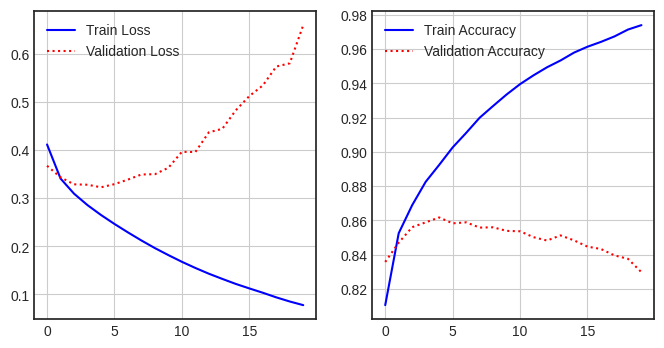

In [70]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

#### 감정 예측

In [71]:
# 감정 예측
def sentiment_predict(new_sentence):
    new_token = [word for word in mecab.morphs(new_sentence) if word not in stopwords]
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen=max_len)
    score=float(model.predict(new_pad))

    if score > 0.5:
        print("{} -> 긍정({:.2f}%)".format(new_sentence, score*100))
    else:
        print("{} -> 부정({:.2f}%)".format(new_sentence, (1-score)*100))

In [72]:
sentiment_predict('정말 재미있고 흥미진진 했어요.')
sentiment_predict('어떻게 이렇게 지루하고 재미없죠?')
sentiment_predict('분위기가 어둡고 스토리가 어려워요')
sentiment_predict('배우 연기력이 대박입니다')

1/1 [==============================] - 0s 364ms/step
정말 재미있고 흥미진진 했어요. -> 긍정(99.86%)
1/1 [==============================] - 0s 21ms/step
어떻게 이렇게 지루하고 재미없죠? -> 부정(99.96%)
1/1 [==============================] - 0s 20ms/step
분위기가 어둡고 스토리가 어려워요 -> 부정(88.10%)
1/1 [==============================] - 0s 17ms/step
배우 연기력이 대박입니다 -> 긍정(99.09%)


### 네이버 쇼핑 리뷰 데이터

* 참고: https://wikidocs.net/94600

#### 데이터 로드

In [73]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="shopping.txt")

('shopping.txt', <http.client.HTTPMessage at 0x7e9991a477f0>)

In [74]:
total_data = pd.read_table('shopping.txt', names=['ratings', 'reviews'])

In [75]:
total_data

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [76]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print(len(total_data))

199908


#### 훈련 데이터와 테스트 데이터 분리

In [80]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default = 0)
# 평점이 3 초과면 1, 그 이하면 0으로 레이블링

total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
199995,2,장마라그런가!!! 달지않아요,0
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,5,넘이쁘고 쎄련되보이네요~,1


In [88]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(total_data, test_size=0.25, random_state=111)
print(len(train_data), len(test_data))

149931 49977


#### 레이블의 분포 확인

<Axes: >

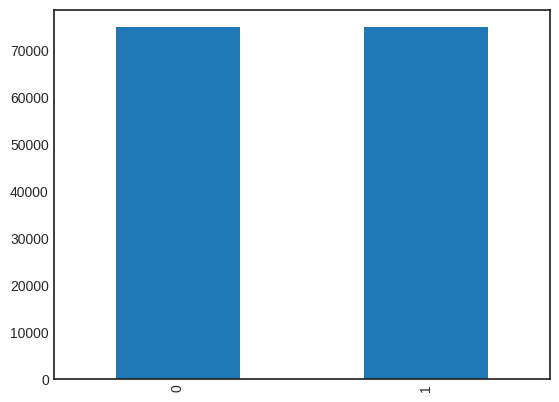

In [89]:
train_data['label'].value_counts().plot(kind='bar')

In [90]:
train_data.groupby('label').size().reset_index(name = 'count')

,label,count
0,0,74974
1,1,74957


#### 데이터 정제

In [91]:
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
train_data['reviews'].replace('', np.nan, inplace=True)
print(len(train_data))

test_data.drop_duplicates(subset=['reviews'], inplace=True)
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
test_data['reviews'].replace('', np.nan, inplace=True)
print(len(test_data))

<ipython-input-91-af8c11e29efc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")


149931


<ipython-input-91-af8c11e29efc>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")


49977


#### 토큰화 및 불용어 제거

* 불용어 사전: `'도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게'`

In [92]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [93]:
mecab = Mecab()
train_data['reviews'] =  train_data['reviews'].apply(mecab.morphs)
train_data['reviews'] =  train_data['reviews'].apply(lambda x : [item for item in x if item not in stopwords])

test_data['reviews'] =  test_data['reviews'].apply(mecab.morphs)
test_data['reviews'] =  test_data['reviews'].apply(lambda x : [item for item in x if item not in stopwords])

In [94]:
X_train = train_data['reviews'].values
y_train = train_data['label'].values
X_test = test_data['reviews'].values
y_test = test_data['label'].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(149931,) (149931,) (49977,) (49977,)


#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [95]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [96]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value
    if value < threshold :
        rare_cnt += 1
        rare_freq = rare_freq + value

print('전체 단어 수:', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수 : {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율 : {}'.format(rare_cnt/words_cnt*100))
print('희귀 단어 등장 빈도 비율 : {}'.format((rare_freq/words_freq)*100))

전체 단어 수: 51259
빈도가 2 이하인 희귀 단어 수 : 33297
희귀 단어 비율 : 64.95834877777561
희귀 단어 등장 빈도 비율 : 1.7489869359289856


In [97]:
vocab_size = words_cnt - rare_cnt + 2
print(vocab_size)

17964


In [98]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [99]:
print(X_train[:3])

[[5439, 3, 265, 15, 1414, 107], [84, 106, 263, 93, 10, 27, 16, 2, 604, 257, 204, 536, 1528, 3171, 1585, 365, 205, 268, 564, 757, 1195, 79, 37, 142, 137, 5928, 1579, 93, 530, 49, 59, 5190, 2, 98], [1250, 31, 61, 78, 8, 26, 15, 6, 115, 2818, 306, 69, 17, 36, 31, 13, 2]]


#### 패딩

리뷰 최대 길이 : 85
리뷰 평균 길이 : 14.819963850037684


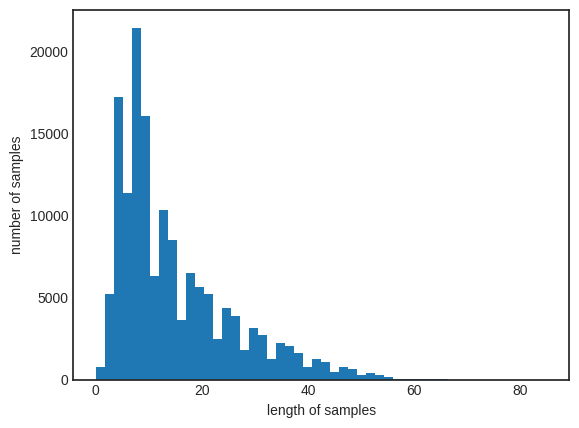

In [101]:
# 패딩 : 리뷰의 길이 맞춰주기
print('리뷰 최대 길이 :', max(len(l) for l in X_train))
print('리뷰 평균 길이 :', sum(map(len, X_train)) / len(X_train))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [102]:
max_len = 60

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [104]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [105]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1,save_best_only=True ) # 가장 좋은 모델 저장함

In [106]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/20
2000/2000 [==============================] - ETA: 0s - loss: 0.3028 - acc: 0.8802
Epoch 1: val_acc improved from -inf to 0.90156, saving model to best_model.h5
2000/2000 [==============================] - 47s 22ms/step - loss: 0.3028 - acc: 0.8802 - val_loss: 0.2646 - val_acc: 0.9016
Epoch 2/20
  15/2000 [..............................] - ETA: 14s - loss: 0.2694 - acc: 0.9022

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2000/2000 [==============================] - ETA: 0s - loss: 0.2378 - acc: 0.9116
Epoch 2: val_acc improved from 0.90156 to 0.90773, saving model to best_model.h5
2000/2000 [==============================] - 16s 8ms/step - loss: 0.2378 - acc: 0.9116 - val_loss: 0.2500 - val_acc: 0.9077
Epoch 3/20
2000/2000 [==============================] - ETA: 0s - loss: 0.2161 - acc: 0.9206
Epoch 3: val_acc improved from 0.90773 to 0.91236, saving model to best_model.h5
2000/2000 [==============================] - 17s 9ms/step - loss: 0.2161 - acc: 0.9206 - val_loss: 0.2346 - val_acc: 0.9124
Epoch 4/20
2000/2000 [==============================] - ETA: 0s - loss: 0.2017 - acc: 0.9272
Epoch 4: val_acc improved from 0.91236 to 0.91323, saving model to best_model.h5
2000/2000 [==============================] - 16s 8ms/step - loss: 0.2017 - acc: 0.9272 - val_loss: 0.2345 - val_acc: 0.9132
Epoch 5/20
2000/2000 [==============================] - ETA: 0s - loss: 0.1899 - acc: 0.9327
Epoch 5: val_acc improve

In [107]:
from keras.models import load_model
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test, y_test)

1562/1562 [==============================] - 9s 5ms/step - loss: 0.2343 - acc: 0.9154


[0.23432986438274384, 0.91544109582901]

#### 시각화

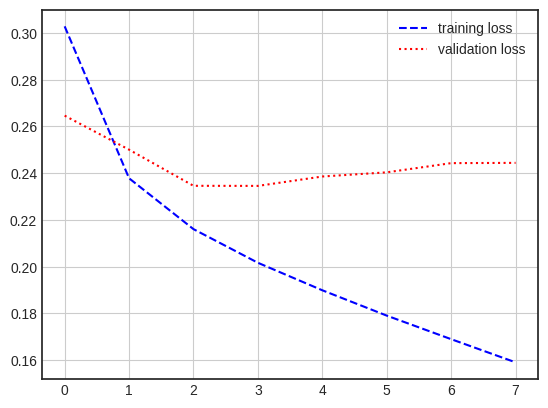

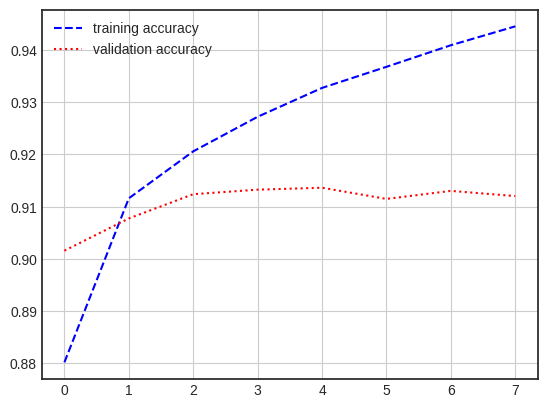

In [108]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='training accuracy')
plt.plot(val_acc, 'r:', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

#### 감정 예측

In [109]:
def sentiment_predict(new_sentence):
    new_token = [word for word in mecab.morphs(new_sentence) if word not in stopwords]
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen=max_len)
    score=float(loaded_model.predict(new_pad))

    if score > 0.5:
        print("{} -> 긍정({:.2f}%)".format(new_sentence, score*100))
    else:
        print("{} -> 부정({:.2f}%)".format(new_sentence, (1-score)*100))


In [110]:
sentiment_predict('처음 써봤는데 대박 좋아요.')
sentiment_predict('원래 배송이 이렇게 늦나요?')
sentiment_predict('좋은 거 인정! 추가 구매 의향 있습니다.')
sentiment_predict('이건 정말 리뷰 쓰는 게 아깝네요.')

1/1 [==============================] - 1s 576ms/step
처음 써봤는데 대박 좋아요. -> 긍정(96.32%)
1/1 [==============================] - 0s 52ms/step
원래 배송이 이렇게 늦나요? -> 부정(98.37%)
1/1 [==============================] - 0s 38ms/step
좋은 거 인정! 추가 구매 의향 있습니다. -> 긍정(96.67%)
1/1 [==============================] - 0s 30ms/step
이건 정말 리뷰 쓰는 게 아깝네요. -> 부정(97.31%)
